In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os




Load MNIST dataset

In [10]:
mnist=tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test)=mnist.load_data()


normalize pixel values

In [11]:
x_train,x_test=x_train/255.0,x_test/255.0

reshape images for cnn(4Dshape with 1 channel)

Build cnn model

In [12]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

Conv2D- lean image features
MaxPooling2D- Reduce size (keep important features)
Flatten-Turn 2D to 1D
softmax- multiclass classification

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

adam-optimizer that adjsut leaning automatically
sparse_categorical_crossentropy- good for multiclass labels
accuracy- model performance

In [14]:
model.fit(x_train, y_train, epochs=5,validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 69s 39ms/step - accuracy: 0.8869 - loss: 0.3687 - val_accuracy: 0.9842 - val_loss: 0.0555
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.9827 - loss: 0.0560 - val_accuracy: 0.9868 - val_loss: 0.0402
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.9874 - loss: 0.0401 - val_accuracy: 0.9875 - val_loss: 0.0395
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.9928 - loss: 0.0234 - val_accuracy: 0.9887 - val_loss: 0.0436
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9939 - loss: 0.0182 - val_accuracy: 0.9892 - val_loss: 0.0376



epochs-5 - Train the model 5 times on data
validation_split-Keeps 10% data to check if the model is overfitting

In [15]:
model.save("cnn_mnist_model.h5")

In [16]:
predictions=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [90]:
image_path ='9.png'
img=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)

Resize to 28x28

In [91]:
img=cv2.resize(img, (28,28))
img=255-img #invert blackwhte
img=img/255.0
img=img.reshape(1,28,28,1)

In [92]:
model = tf.keras.models.load_model("cnn_mnist_model.h5")
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


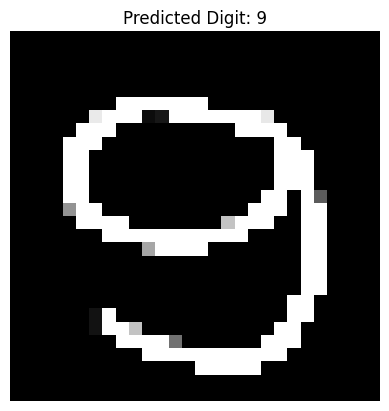

In [93]:
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()